# Task 1

In [1]:
from dataclasses import dataclass

@dataclass
class Point:
    '''keeps track of the data for each point p in the csv file '''
    
    date: str # the date this point was recorded
    id: str # the unique id of the car
    x: float # the x coordinate
    y: float # the y coordinate

In [2]:
import csv

def readPoints(csvFilePath):
    '''a function to convert a csv file of points into a list of Point classes'''

    # read raw data from csv file
    with open(csvFilePath, "r") as f:
        data = list(csv.reader(f, delimiter=","))[1:]

    # iterate through each row and convert the data to a Point class
    points = []
    for p in data:
        # add the Point class onto the list of points
        points.append(Point(p[0], p[1], float(p[2]), float(p[3])))

    # strip the x and y values from points
    xPoints = [p.x for p in points]
    yPoints = [p.y for p in points]

    # compute the boundaries for the points, to be used later in the preprocessing step
    minX, maxX = min(xPoints), max(xPoints)
    minY, maxY = min(yPoints), max(yPoints)

    return points, xPoints, yPoints, minX, maxX, minY, maxY

# initialize the 'points' list to be all the points in the csv file containing 10 percent of the data
csvFilePath = '/work/geolife-cars-ten-percent.csv'
points, xPoints, yPoints, minX, maxX, minY, maxY = readPoints(csvFilePath)

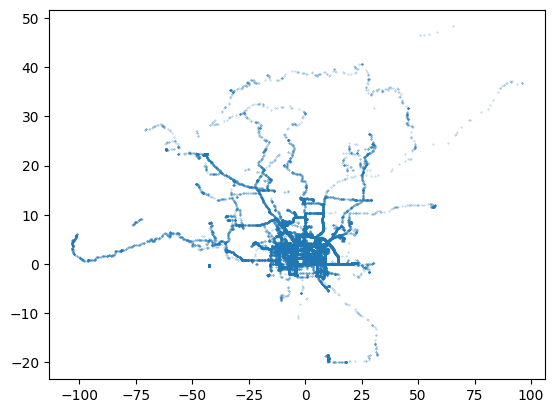

In [3]:
import matplotlib.pyplot as plt

def visualizePoints(points):
    ''' plot each point to make sure the data is being read properly in 'readPoints' '''

    plt.scatter(xPoints, yPoints, s=0.1, alpha=0.5)
    plt.show()

visualizePoints(points)

In [4]:
def pointToCell(p, r):
    ''' utility function for mapping a point to the grid cell it belongs in during the preprocessing step'''

    # center the grid at the smallest x and y value of any point
    centeredX = p.x - minX
    centeredY = p.y - minY

    # compute the row and column of the corresponding grid cell
    row = int(centeredY // r)
    col = int(centeredX // r)

    return row, col

def cellToPoint(row, col, r):
    ''' computes the inverse of 'pointToCell', useful for returning the x and y coordinates of the hubs'''

    # multiply the row and column index of the grid cell by the side length of each cell
    centeredX = col * r + r/2
    centeredY = row * r + r/2

    # undo the centering of the point to return the true x and y value
    decenteredX = centeredX + minX
    decenteredY = centeredY + minY
    return Point('','', decenteredX, decenteredY)

In [5]:
def preprocess(points, r):
    ''' compute the grid and the density of each point in the grid '''

    # compute the number of rows and columns in the grid
    n = int((maxY - minY) // r) + 1 # rows
    m = int((maxX - minX) // r) + 1  # columns

    # initiliaze the values of the grid to 0
    grid = [[0 for _ in range(m)] for _ in range(n)]

    # iterate through each point and increment the density of the corresponding grid cell by 1
    for p in points:
        row, col = pointToCell(p, r)
        grid[row][col] += 1

    # flatten the grid values into a list of tuples
    # the first element in the tuple represents the density, the second represents the row-column coordinate of the cell
    sortedGrid = [(grid[i][j], (i,j)) for i in range(n) for j in range(m)]

    # sort the values in descending order based on density
    sortedGrid.sort(reverse=True)

    return grid, sortedGrid

# initiliaze r to equal 2 kilometers
r = 2.0
grid, sortedGrid = preprocess(points, r)

In [6]:
def density(p, r):
    ''' calculate the density of an arbitrary point by returning the density of the grid cell that the point falls within '''

    row, col = pointToCell(p, r)
    return grid[row][col]

p = points[10000]
dens = density(p, r=2.)
print(f'the density of point {p=} is density={dens}')

the density of point p=Point(date='2009-12-24 06:23:31', id='163-20091224024334', x=2.597577, y=3.440068) is density=1281


In [7]:
def hubs(points, k, r):
    ''' find the top k most dense hubs '''
    ''' requires the running of 'preprocess' before calling this function '''

    # return a list of tuples for the top k densest grid cells
    # the first element is the Point of of the center of the grid cell
    # the second is the density value of this cell
    hubCoordinates = [(cellToPoint(*h[1], r), h[0]) for h in sortedGrid[:k]]

    return hubCoordinates

hubs(points, k=5, r=2.0)

[(Point(date='', id='', x=-8.528465999999995, y=2.9739250000000013), 6037),
 (Point(date='', id='', x=-6.5284659999999946, y=2.9739250000000013), 3348),
 (Point(date='', id='', x=-10.528465999999995, y=2.9739250000000013), 2344),
 (Point(date='', id='', x=-4.5284659999999946, y=2.9739250000000013), 2171),
 (Point(date='', id='', x=-8.528465999999995, y=8.973925000000001), 2137)]

In [8]:
def reportHubs(k):
    ''' display the results of calling 'hubs' on the same plot as all the other points'''

    # compute and display k highest density hubs
    highestDensityHubs = hubs(points, k=k, r=r)
    print(highestDensityHubs)

    # plot all points in the csv file
    plt.scatter(xPoints, yPoints, s=0.1, alpha=0.05)

    # plot each hub as an orange square with total are r^2
    plt.scatter([h[0].x for h in highestDensityHubs],
                [h[0].y for h in highestDensityHubs],
                s=r**2,
                marker='s')
    plt.show()

[(Point(date='', id='', x=-8.528465999999995, y=2.9739250000000013), 6037), (Point(date='', id='', x=-6.5284659999999946, y=2.9739250000000013), 3348), (Point(date='', id='', x=-10.528465999999995, y=2.9739250000000013), 2344), (Point(date='', id='', x=-4.5284659999999946, y=2.9739250000000013), 2171), (Point(date='', id='', x=-8.528465999999995, y=8.973925000000001), 2137), (Point(date='', id='', x=-4.5284659999999946, y=-1.0260749999999987), 2132), (Point(date='', id='', x=-10.528465999999995, y=8.973925000000001), 2016), (Point(date='', id='', x=1.4715340000000054, y=2.9739250000000013), 1952), (Point(date='', id='', x=5.4715340000000054, y=2.9739250000000013), 1943), (Point(date='', id='', x=-4.5284659999999946, y=4.973925000000001), 1467), (Point(date='', id='', x=7.4715340000000054, y=0.9739250000000013), 1431), (Point(date='', id='', x=5.4715340000000054, y=0.9739250000000013), 1386), (Point(date='', id='', x=-0.5284659999999946, y=2.9739250000000013), 1384), (Point(date='', id=

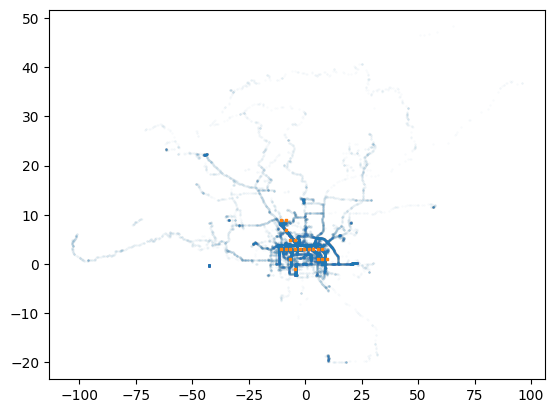

In [9]:
reportHubs(k=20)

In [10]:
%%time

''' report the algorithm's runtime for k=5 '''

r = 2.0
k = 5
highestDensityHubs = hubs(points, k=5, r=r)

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 16.7 µs


In [11]:
%%time

''' report the algorithm's runtime for k=10 '''

r = 2.0
k = 10
highestDensityHubs = hubs(points, k=5, r=r)

CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 15.3 µs


In [12]:
%%time

''' report the algorithm's runtime for k=20 '''

r = 2.0
k = 20
highestDensityHubs = hubs(points, k=5, r=r)

CPU times: user 13 µs, sys: 3 µs, total: 16 µs
Wall time: 18.1 µs


In [13]:
%%time

''' report the algorithm's runtime for k=40 '''

r = 2.0
k = 40
highestDensityHubs = hubs(points, k=5, r=r)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 14.5 µs


In [14]:
%%time

''' report the algorithm's runtime for k=10, r=8km on 10% of the total data '''

csvFilePath = '/work/geolife-cars-ten-percent.csv'
points, xPoints, yPoints, minX, maxX, minY, maxY = readPoints(csvFilePath)
grid, sortedGrid = preprocess(points, r)

k = 10
r = 8.0
highestDensityHubs = hubs(points, k=k, r=r)

CPU times: user 231 ms, sys: 5.92 ms, total: 237 ms
Wall time: 245 ms


In [15]:
%%time

''' report the algorithm's runtime for k=10, r=8km on 30% of the total data '''

csvFilePath = '/work/geolife-cars-thirty-percent.csv'
points, xPoints, yPoints, minX, maxX, minY, maxY = readPoints(csvFilePath)
grid, sortedGrid = preprocess(points, r)

k = 10
r = 8.0
highestDensityHubs = hubs(points, k=k, r=r)

CPU times: user 795 ms, sys: 22.6 ms, total: 818 ms
Wall time: 827 ms


In [16]:
%%time

''' report the algorithm's runtime for k=10, r=8km on 60% of the total data '''

csvFilePath = '/work/geolife-cars-sixty-percent.csv'
points, xPoints, yPoints, minX, maxX, minY, maxYY = readPoints(csvFilePath)
grid, sortedGrid = preprocess(points, r)

k = 10
r = 8.0
highestDensityHubs = hubs(points, k=k, r=r)

CPU times: user 1.57 s, sys: 63.3 ms, total: 1.64 s
Wall time: 1.64 s


In [17]:
# load the full dataset of points for the rest of the problems
csvFilePath = '/work/geolife-cars.csv'
points, xPoints, yPoints, minX, maxX, minY, maxYY = readPoints(csvFilePath)
grid, sortedGrid = preprocess(points, r)

# Task 2

Distance function explanation:

The distance function takes two arguments: a point q and an edge e. The function finds the slope of the edge and uses this to calculate the slope of a perpendicular line. A helper class then finds the intersection point of the perpendicular line and the edge. This minimum of the distance from the two endpoints of the edge and the perpendicular point with the point q is then returned.

In [18]:
import math

def calculateIntersect(A, slopeA, B, slopeB):
    ''' helper function for task 2 distance function; calcuates the intersect of two lines given slope and a point of each'''
    
    # formula for x value of intersect point
    x_int = (B.y - A.y + slopeA * A.x - slopeB * B.x) / (slopeA - slopeB)
    y_int = slopeA * (x_int - A.x) + A.y

    ret = Point('', '', x_int, y_int)
    return ret

In [19]:
## Note: q is a Point and e is a tuple of Point Coordinates

def d(q, e):
    '''  Determines the distance between a point q and edge e'''

    # ensures that edge e is passed with the lower x value first
    if (e[0][0] > e[1][0]): 
        high = e[0]
        low = e[1]
        e = (low, high)

    #set xs and ys and calulcate slope
    x1, y1 = e[0][0], e[0][1]
    x2, y2 = e[1][0], e[1][1]
    slopeOfEdge = (y2-y1)/(x2-x1)

    #calculate slope of the perpendicular edge and find intersect between perpendicular line and edge - this is the shortest distance
    slopeOfPerpendicular = -(slopeOfEdge**-1) 
    intersect = calculateIntersect(Point('', '', x1, y1), slopeOfEdge, q, slopeOfPerpendicular)

    #if the perpendicular point is within the x values of the edge, return the minimum of two endpoints and perpendicular
    if (intersect.x >= x1 and intersect.x <= x2): 
        return min(math.dist((q.x, q.y), (e[0][0], e[0][1])), math.dist((q.x, q.y), (e[1][0], e[1][1])),
        math.dist((q.x, q.y), (intersect.x, intersect.y)))
    else: #return the minimum of just the endpoints
        return min(math.dist((q.x, q.y), (e[0][0], e[0][1])), math.dist((q.x, q.y), (e[1][0], e[1][1])))

In [20]:
def getTrajectory(points, trajectoryId):
    ''' computes a list of points for each trajectory given a trajectory id'''

    # filter through points and add the point if it has the same trajectory id
    T = [p for p in points if p.id == trajectoryId]
    
    return T

In [21]:
def TS_greedy(T, e):
    ''' compute the simplified trajectory using Greedy Algorithm '''
    s, t = T[0], T[len(T)-1]

    # base case: if sub-trajectory size is 2, then return
    if len(range(1, len(T)-1)) <= 2:
        return T

    # find all distances to edge between endpoints s, t
    dists, maxx, ind = [], 0, -1
    for a in T[1:len(T)-1]:
        dists.append(d(a, ((s.x, s.y), (t.x, t.y))))

    # find the maximum distance from edge 
    if (len(dists)>0):
        maxx = max(dists)
        ind = 1 + dists.index(maxx)
    
    # base case: if sub-trajectory contains no dist greater than error, return
    if maxx <= e:
        return [s, t]
    
    # recursive step: recurse with point in question added into simplified trajectory
    else:
        # print("m: ", maxx ,"err: ",  e)
        return TS_greedy(T[:ind+1], e) + TS_greedy(T[ind:], e)[1:]



In [22]:
# create variables from database
csvFilePath = '/work/geolife-cars.csv'
points, xPoints, yPoints, minX, maxX, minY, maxYY = readPoints(csvFilePath)

18 14 5
321


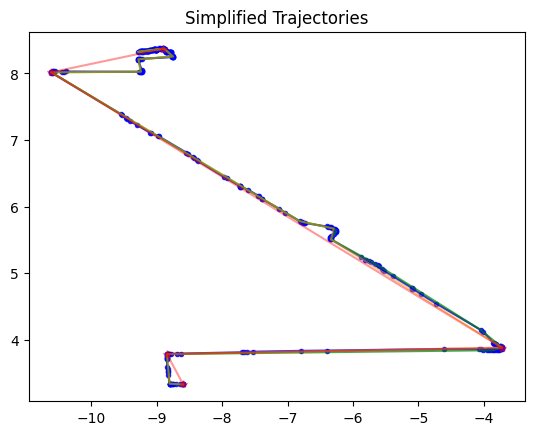

In [23]:
# compute trajectories with algorithm
trajID = '128-20080503104400'
P = getTrajectory(points, trajID)
best = TS_greedy(P, 0.03)
med = TS_greedy(P, 0.1)
worst = TS_greedy(P, 0.3)

# print lengths of trajectories
print(len(best), len(med), len(worst))
print(len(P))

# plotting simplified trajectories and original
plt.plot([h.x for h in P],
                [h.y for h in P],
               marker = '.', color = 'blue', alpha =0.8)
plt.plot([h.x for h in best],
                [h.y for h in best],
                color = 'green', alpha = 0.7)
plt.plot([h.x for h in med],
                [h.y for h in med],
                color = 'orange', alpha = 0.5)
plt.plot([h.x for h in worst],
                [h.y for h in worst],
                marker = '*', color = 'red', alpha=0.4)
plt.title("Simplified Trajectories")
plt.show()

In [24]:
# calculating compression ratios for each trajectory ID
# get length of original trajectory, length of simplified, and divide for each
trajIDs = ['128-20080503104400', '010-20081016113953', '115-20080520225850', '115-20080615225707']
t2s = [getTrajectory(points, x) for x in trajIDs]
t2_paths = [TS_greedy(P, 0.03) for P in t2s]
for i in range(len(t2s)):
    print("Compression Ratio: ", len(t2s[i])/len(t2_paths[i]), "ID: ", trajIDs[i])

Compression Ratio:  17.833333333333332 ID:  128-20080503104400
Compression Ratio:  49.36363636363637 ID:  010-20081016113953
Compression Ratio:  30.930232558139537 ID:  115-20080520225850
Compression Ratio:  30.041666666666668 ID:  115-20080615225707


# Task 3

In [25]:
def dist(p1, p2):
    ''' compute the euclidian distance between two Point objects '''
    
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y
    distance = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** .5
    return distance

def dist2(p1, p2):
    ''' compute the euclidian distance squared between two Point objects '''
    
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y
    distance = (x2 - x1) ** 2 + (y2 - y1) ** 2
    return distance

In [26]:
def dtw(P, Q):
    ''' compute the dynamic time warping between trajectory P and Q '''

    def createTables():
        ''' initializes and populates the tables D and E
        D(i,j) represents the minimum total distance between all assignments up to index i in trajectory P and up to index j in trajectory Q
        E(i,j) represents |E| in the computation of D(i,J) '''

        # initiliaze D and E to be n by m matrices
        D = [[0 for _ in range(m)] for _ in range(n)]
        E = [[0 for _ in range(m)] for _ in range(n)]

        # initialize the base cases of the tables
        # D(0,0) is the distance between the first two points of the trajectories
        D[0][0] = dist2(P[0], Q[0])
        
        # E(0,0) is 1 because there are 1 total assignments in D(0,0)
        E[0][0] = 1

        # iterate through each cell of the table and populate the tables D and E according to the transition functions
        for i in range(n):
            for j in range(m):
                # skip over (0,0) for both tables, since this base case was previously computed
                if i == j == 0: continue

                # create a list of values for D(i,j) / E(i,j) where i and j are indices for the cells
                # above, to the left, and to the top corner of the current cell
                prevCells = [
                                (dist2(P[i], Q[j]) + D[i+di][j+dj]) / (E[i+di][j+dj] + 1)
                                if 0 <= i+di and 0 <= j+dj
                                else float('inf')
                                for di, dj in offsets
                            ]

                # find the indices of the previous cell that minimizes D(i,j) / E(i,j)
                minD = min(prevCells)
                argminD = prevCells.index(minD)
                di, dj = offsets[argminD]

                # update D(i,j) to be the minimum of previous cells D plus the euclidian distance between P[i] and Q[j]
                D[i][j] = dist2(P[i], Q[j]) + D[i+di][j+dj]

                # update E(i,j) to be the value of 
                E[i][j] = E[i+di][j+dj] + 1
        
        return D, E
    
    def retraceTables(D, E):
        ''' retraces the distances between each pair of assigned points in the optimal solution '''

        # initialize a list of distances between assigned pair
        edgeLengths = []

        # start at the bottom right corner of the tables
        i, j = n-1, m-1

        # iterate through each assignment pair backwards and stop once we reach the top left corner 
        while i != 0 and j != 0:

            # find the previous cell that we used to compute D(i,j) in the 'populateTables' function
            prevCells = [
                            (D[i+di][j+dj]) / (E[i+di][j+dj])
                            if 0 <= i+di and 0 <= j+dj
                            else float('inf')
                            for di, dj in offsets
                        ]

            # find the offsets of this specific cell
            minD = min(prevCells)
            argminD = prevCells.index(minD)
            di, dj = offsets[argminD]

            # compute the length of the assignment pairs and add it to the result
            edgeLength = dist2(P[i+di], Q[j+dj])
            edgeLengths.append(edgeLength)

            # move to this next cell
            i += di
            j += dj

        # insert the edge length between the last points of P and Q
        edgeLengths.insert(0, dist2(P[-1], Q[-1]))

        # (not necessary) reverse the list to return the edge lenghts in order
        edgeLengths = edgeLengths[::-1]
        
        return D[-1][-1] / E[-1][-1], edgeLengths

    # compute the dimensions of the tables
    n, m = len(P), len(Q)

    # create a list of row-column offsets that represent the cell to the left, top, and top-left of the current cell
    offsets = [(-1,0), (0,-1), (-1,-1)]

    # create the tables D and E
    D, E = createTables()

    # return the minimum distance and a list of distances between assigned pairs
    Eavg, edgeLengths = retraceTables(D, E)

    return Eavg, edgeLengths

In [27]:
def fd(P, Q):
    ''' compute the frechet distance between trajectories P and Q '''

    def createTable():
        ''' initialize and populate the table D where D(i,j) represents the minimum frechet distance of the sub-trajectoreis P[:i] and Q[:j] '''

        # initialize D to be a n by m matrix
        D = [[0 for _ in range(m)] for _ in range(n)]

        # intialize the base case where D(0,0) is the distance between the first two points of the trajectories
        D[0][0] = dist(P[0], Q[0])

        # iterate through each cell of the table and populate the table according to the transition function
        for i in range(n):
            for j in range(m):

                # skip over (0,0) for both tables, since this base case was previously computed
                if i == j == 0: continue

                # create a list of values for D(i,j) where i and j are indices for the cells
                # above, to the left, and to the top corner of the current cell plus the current distance between assigned points
                prevCells = [
                                max(dist(P[i], Q[j]) ** 2, D[i+di][j+dj])
                                if 0 <= i+di and 0 <= j+dj
                                else float('inf')
                                for di, dj in offsets
                            ]

                # update D(i,j) to be the minimum of previous cells
                D[i][j] = min(prevCells)

        return D

    def retraceTable(D):
        ''' retraces the distances between each pair of assigned points in the optimal solution '''

        # initialize a list of distances between assigned pair
        edgeLengths = []

        # start at the bottom right corner of the tables
        i, j = n-1, m-1

        # iterate through each assignment pair backwards and stop once we reach the top left corner 
        while i != 0 and j != 0:

            # find the previous cell that we used to compute D(i,j) in the 'populateTables' function
            prevCells = [
                            D[i+di][j+dj]
                            if 0 <= i+di and 0 <= j+dj
                            else float('inf')
                            for di, dj in offsets
                        ]
            
            # find the offsets of this specific cell
            minD = min(prevCells)
            argminD = prevCells.index(minD)
            di, dj = offsets[argminD]

            # compute the length of the assignment pairs and add it to the result
            edgeLength = dist(P[i+di], Q[j+dj]) ** 2
            edgeLengths.append(edgeLength)

            # move to this next cell
            i += di
            j += dj

        # insert the edge length between the last points of P and Q
        edgeLengths.insert(0, dist(P[-1], Q[-1]))

        # (not necessary) reverse the list to return the edge lengths in order
        edgeLengths = edgeLengths[::-1]

        return D[-1][-1], edgeLengths

    # compute the dimensions of the tables
    n, m = len(P), len(Q)

    # create a list of row-column offsets that represent the cell to the left, top, and top-left of the current cell
    offsets = [(-1,0), (0,-1), (-1,-1)]

    # create the tables D and E
    D = createTable()

    # return the minimum distance and a list of distances between assigned pairs
    Emax, edgeLengths = retraceTable(D)

    return Emax, edgeLengths

# T1 = [Point('','',0,0), Point('','',1,0), Point('','',2,0), Point('','',3,0), Point('','',4,0)]
# T2 = [Point('','',0,0), Point('','',1,0), Point('','',4,0)]
# fd(T1, T2)

In [28]:
def displayResults(trajectories):
    ''' display the results of Eavg and Emax for a list of trajectory pairs '''

    # initialize a list of tuples that contains (Eavg, dtwEdgeLengths, Emax, dfEdgeLengths)
    results = []

    # iterate through each trajectory pair
    for T1, T2 in trajectories:

        # compute (Eavg, dtwEdgeLengths, Emax, dfEdgeLengths)
        Eavg, dtwEdgeLengths = dtw(T1, T2)
        Emax, dfEdgeLengths = fd(T1, T2)

        # append the results
        results.append( (Eavg, dtwEdgeLengths, Emax, dfEdgeLengths) )

    # iterate through each result and display the information
    for i in range(len(results)):

        # unpack tuple
        Eavg, dtwEdgeLengths, Emax, dfEdgeLengths = results[i]

        # get trajectory ids
        id1, id2 = trajectoryPairs[i]

        # plot a histogram of the edge lengths for dtw and df
        fig, (ax0, ax1) = plt.subplots(1, 2)
        fig.tight_layout(pad=3)
        ax0.hist(dtwEdgeLengths)
        ax0.set_xlabel('Edge length (km)')
        ax0.set_ylabel('Number of edges in $E_{avg}$')
        ax1.hist(dfEdgeLengths)
        ax1.set_xlabel('Edge length (km)')
        ax1.set_ylabel('Number of edges in $E_{max}$')
        plt.show()

        # print the results of Eavg and Emax
        print(f'For trajectories {id1} and {id2}, {Eavg=:.4f} and {Emax=:.4f}')

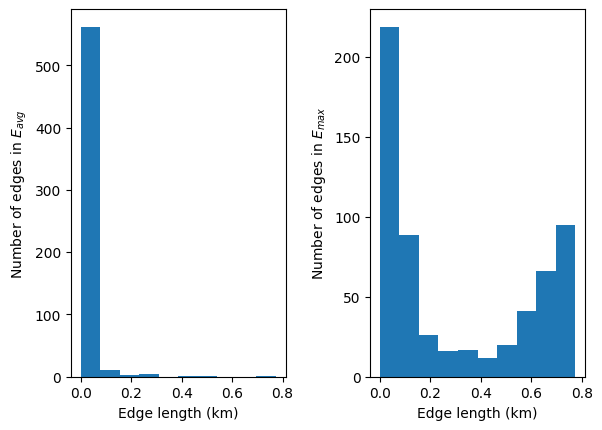

For trajectories 128-20080503104400 and 128-20080509135846, Eavg=0.0108 and Emax=0.7739


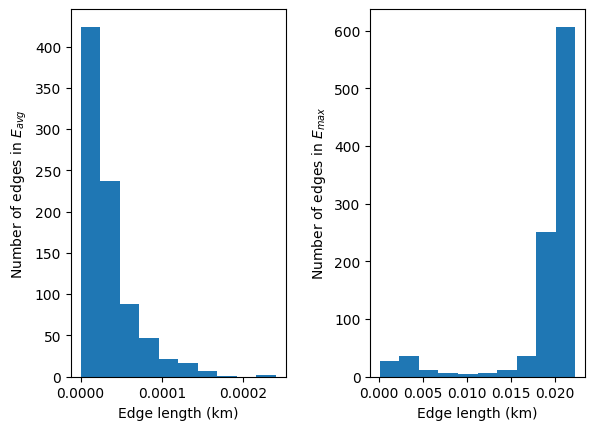

For trajectories 010-20081016113953 and 010-20080923124453, Eavg=0.0000 and Emax=0.0223


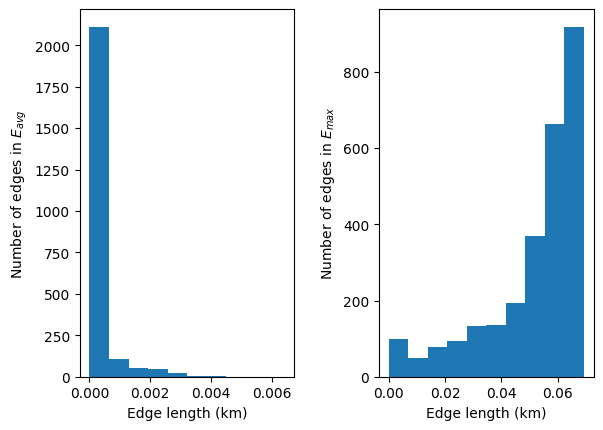

For trajectories 115-20080520225850 and 115-20080615225707, Eavg=0.0003 and Emax=0.0692


In [29]:
# read a list of example trajectory ids
trajectoryPairs = [('128-20080503104400', '128-20080509135846'),
                    ('010-20081016113953', '010-20080923124453'),
                    ('115-20080520225850', '115-20080615225707')]

# compute the list of points for each trajectory
trajectories = [(getTrajectory(points, id1), getTrajectory(points, id2))
                for id1, id2 in trajectoryPairs]

# display the histograms
displayResults(trajectories)

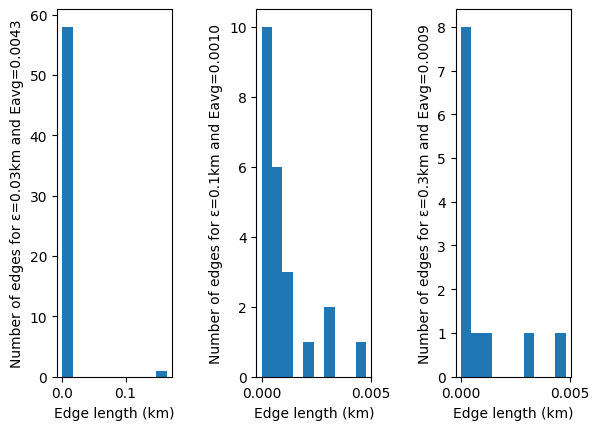

In [30]:
''' Compute a simplification of each of T1 = 115-20080520225850, T2 = 115-20080615225707 for ε = 0.03,0.1,0.3'''

# compute trajectories from their trajectory id
epsilons = [0.03, 0.1, 0.3]
trajectoryIds = ('115-20080520225850', '115-20080615225707')
T1, T2 = getTrajectory(points, trajectoryIds[0]), getTrajectory(points, trajectoryIds[1])

# intitialize the plot with 3 subplots
fig, axes = plt.subplots(1, 3)
fig.tight_layout(pad=3)

# iterate over each value of epsilon
for i in range(len(epsilons)):

    # compute the epsilon simplification of T1 and T2
    e = epsilons[i]
    T1e = TS_greedy(T1, e)
    T2e = TS_greedy(T2, e)

    # compute the distance between the two simplified trajectories
    Eavg, edgeLengths = dtw(T1e, T2e)

    # plot the histogram of edge lengths on this epislon value's subplot
    axes[i].hist(edgeLengths)
    axes[i].set_xlabel('Edge length (km)')
    axes[i].set_ylabel(f'Number of edges for ε={e}km and {Eavg=:.4f}')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=044a4d18-3d44-4a07-adc0-4ca81cdec6c8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>